In [5]:
from keras import models
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [2]:
generator = models.load_model("generator-mnist-cgan.h5")
generator.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ label_input_layer   │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ label_embedding_la… │ (None, 1, 50)     │        500 │ label_input_laye… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noise_input_layer   │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 50)        │          0 │ label_embedding_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 6272)      │    633,472 │ noise_input_laye… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 6272)      │    319,872 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 7, 7, 128) │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 7, 7, 128) │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 7, 7, 256) │          0 │ reshape[0][0],    │
│ (Concatenate)       │                   │            │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 7, 7, 128) │    295,040 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 7, 7, 128) │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 14, 14,    │          0 │ batch_normalizat… │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 14, 14,    │     73,792 │ up_sampling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 28, 28, 1) │        577 │ up_sampling2d_1[… │
│ (Conv2D)            │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,324,021 (5.05 MB)

 Trainable params: 1,323,637 (5.05 MB)

 Non-trainable params: 384 (1.50 KB)

## Following function randomly selects a label between 0-9

In [39]:
def sbplt(rows, cols, generator, ):

  num_samples = rows*cols
  num_labels = 10
  noise_dim = 100
  
  noises = tf.random.normal([num_samples, noise_dim])

  label = np.random.choice(num_labels, size=(num_samples, 1))
  label = tf.convert_to_tensor(label, dtype=tf.int32)
  
  generated_imgs = generator([noises, label], training = False)
  
  plt.figure(figsize = (rows*2,cols*2))

  for i in range (rows*cols):
    plt.subplot(rows, cols, i+1)
    plt.imshow(generated_imgs[i,:,:,0]*127.5 + 127.5, cmap = 'gray')
    
    plt.title(f'{label[i]}')
    plt.axis('off')
    plt.axis('off')

  plt.tight_layout()
  plt.show()
  return

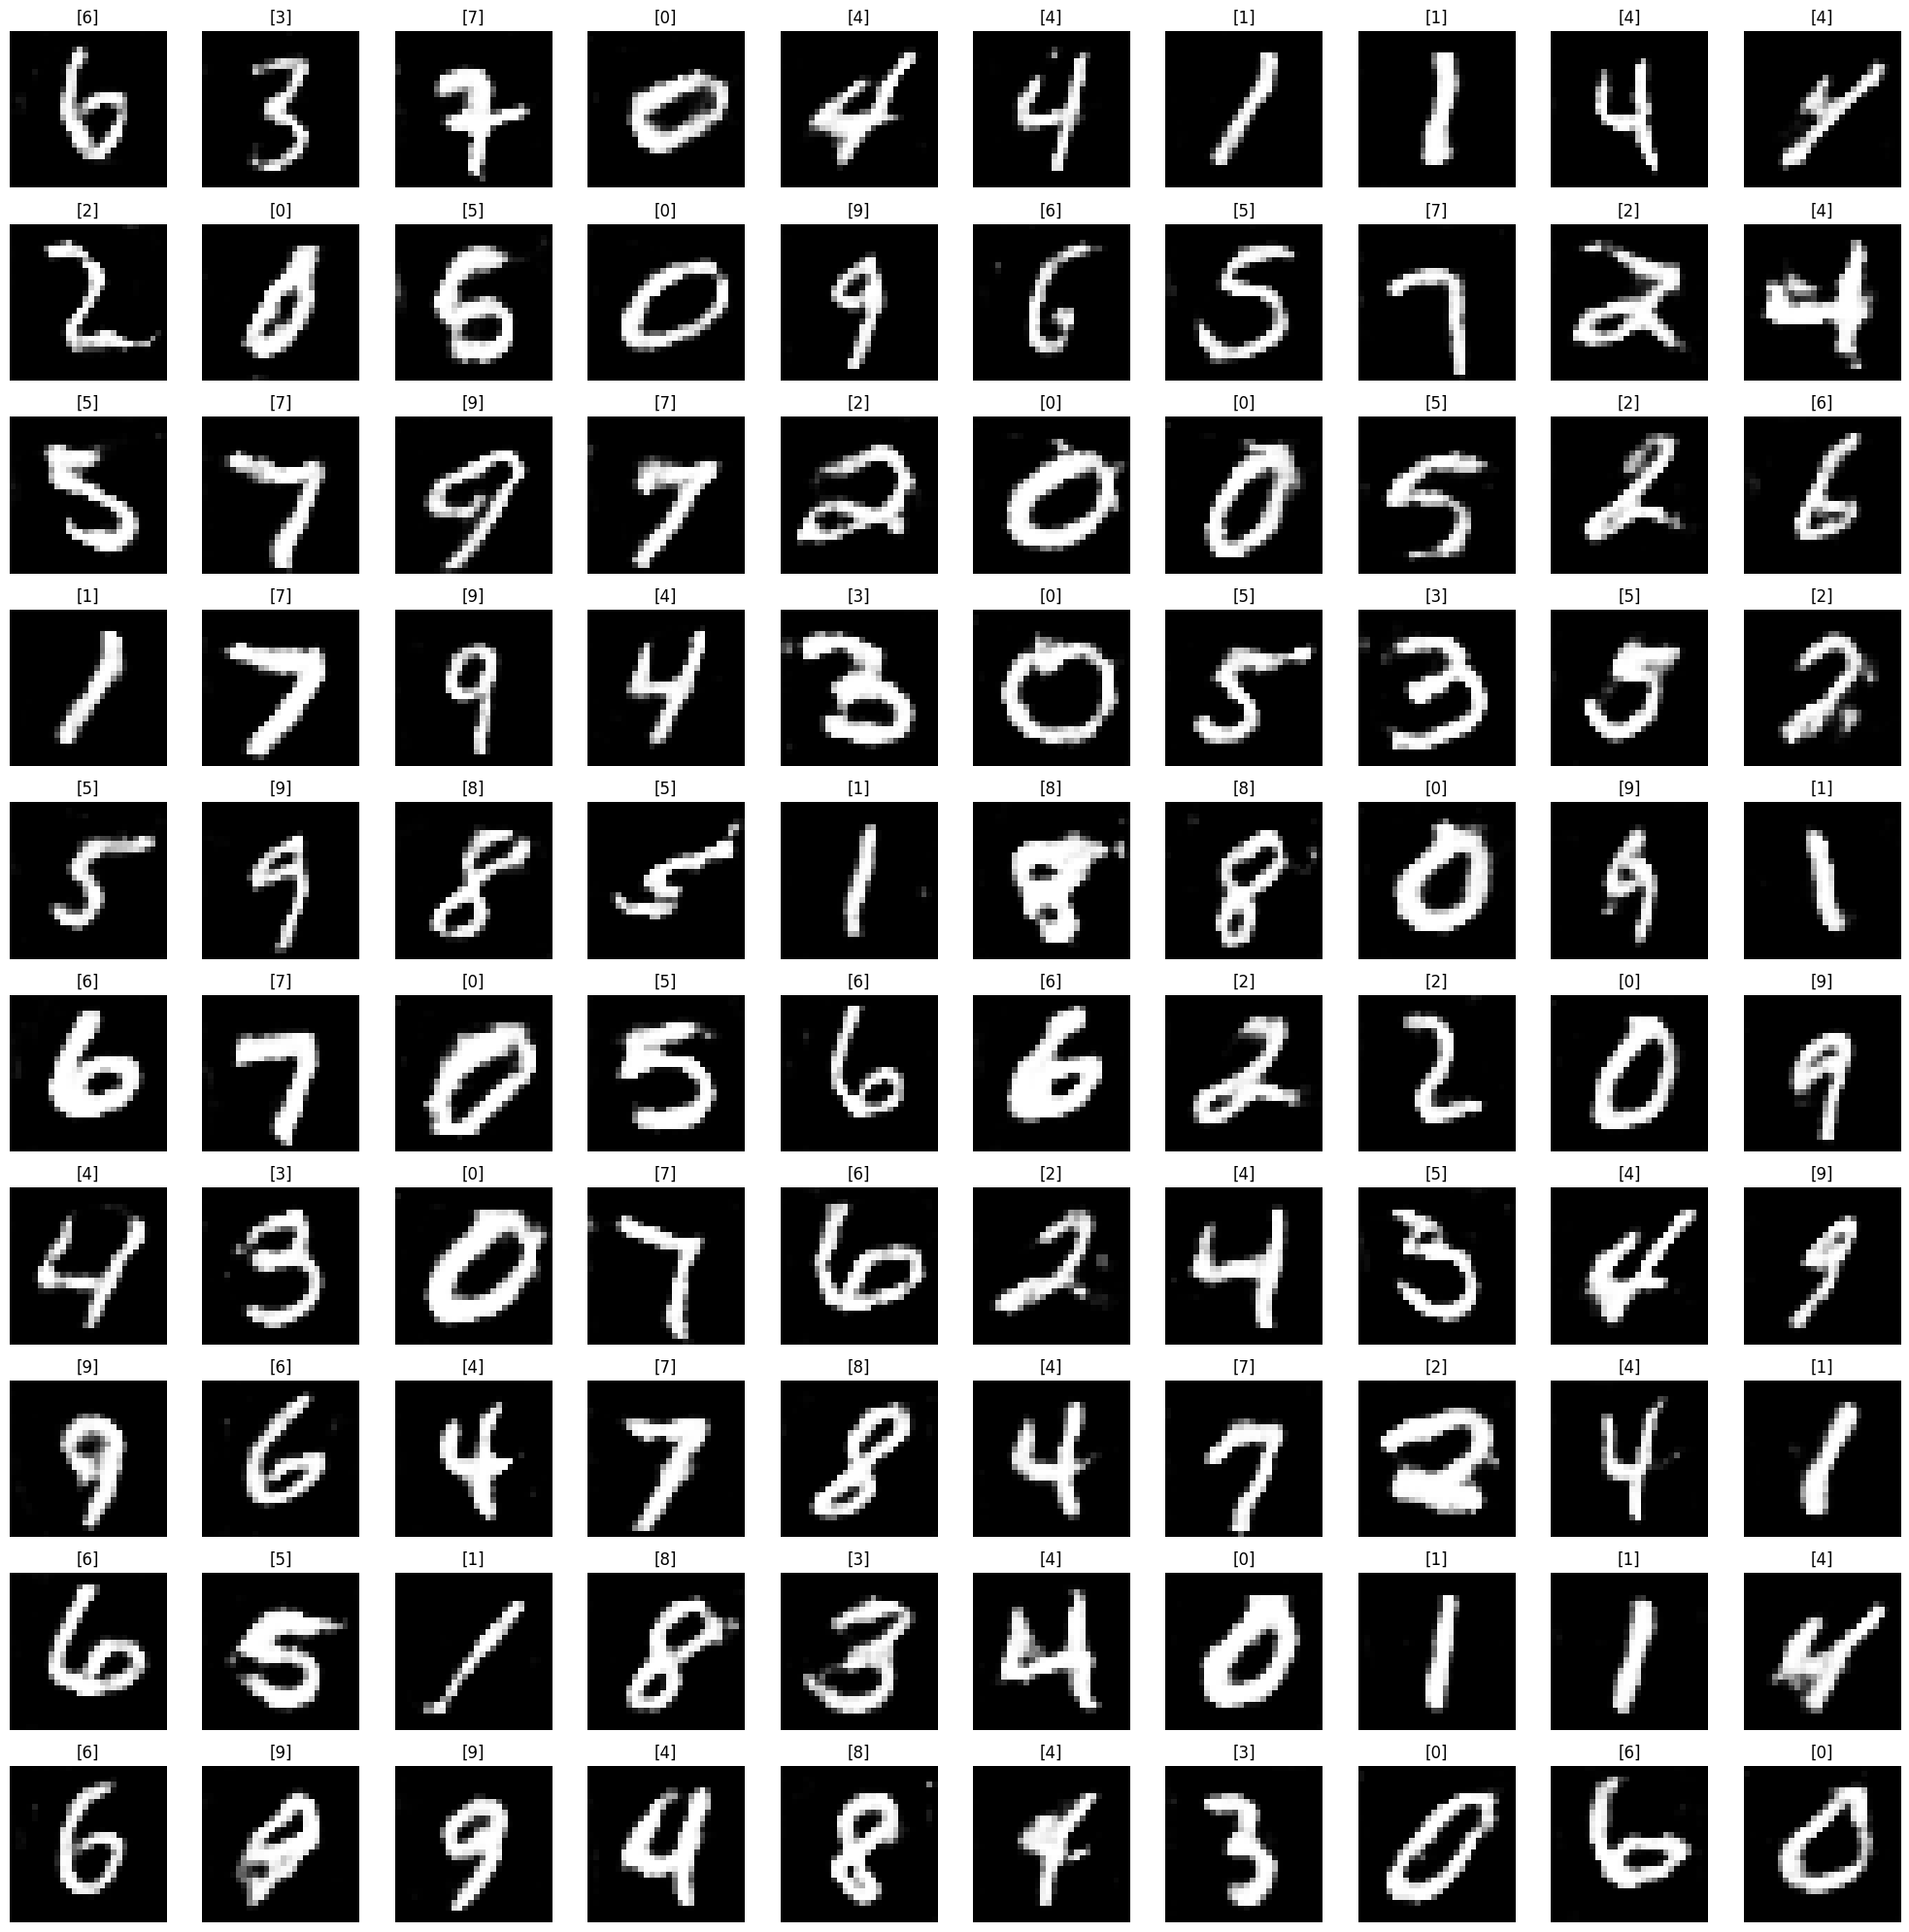

In [43]:
sbplt(rows = 10,cols = 10,generator=generator)

## If manually you wanna give a label, run following cell

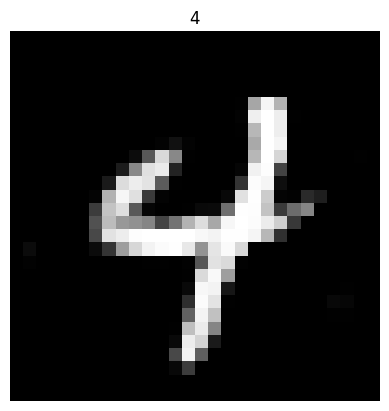

In [53]:
num_samples = 1
num_labels = 10
noise_dim = 100

noises = tf.random.normal([num_samples, noise_dim])

input_label = int(input("Enter the label = "))

if input_label<=9 and input_label>=0:
  label = tf.convert_to_tensor([[input_label]], dtype=tf.int32)

  generated_imgs = generator([noises, label], training = False)

  plt.imshow(generated_imgs[0,:,:,0]*127.5 + 127.5, cmap = 'gray')
  plt.title(f'{input_label}')
  plt.axis('off')
  plt.show()
  
else :
  print(f"{input_label} is out of range.\ninput_label range is 0-9")

______________________

In [71]:
def pltAll(generator, img_per_label = 10):

  rows = img_per_label
  cols = 10
  
  num_samples = rows*cols
  num_labels = 10
  noise_dim = 100
  
  noises = tf.random.normal([num_samples, noise_dim])

  label = []
  
  for j in range(img_per_label):
      for i in range(num_labels):
          label.append(i) 
  
  label = tf.convert_to_tensor(label, dtype=tf.int32)
  
  generated_imgs = generator([noises, label], training = False)
  
  plt.figure(figsize = (rows*2,cols*2))

  for i in range (rows*cols):
    plt.subplot(rows, cols, i+1)
    plt.imshow(generated_imgs[i,:,:,0]*127.5 + 127.5, cmap = 'gray')
    
    plt.title(f'{label[i]}')
    plt.axis('off')
    plt.axis('off')

  # plt.tight_layout()
  plt.show()
  return

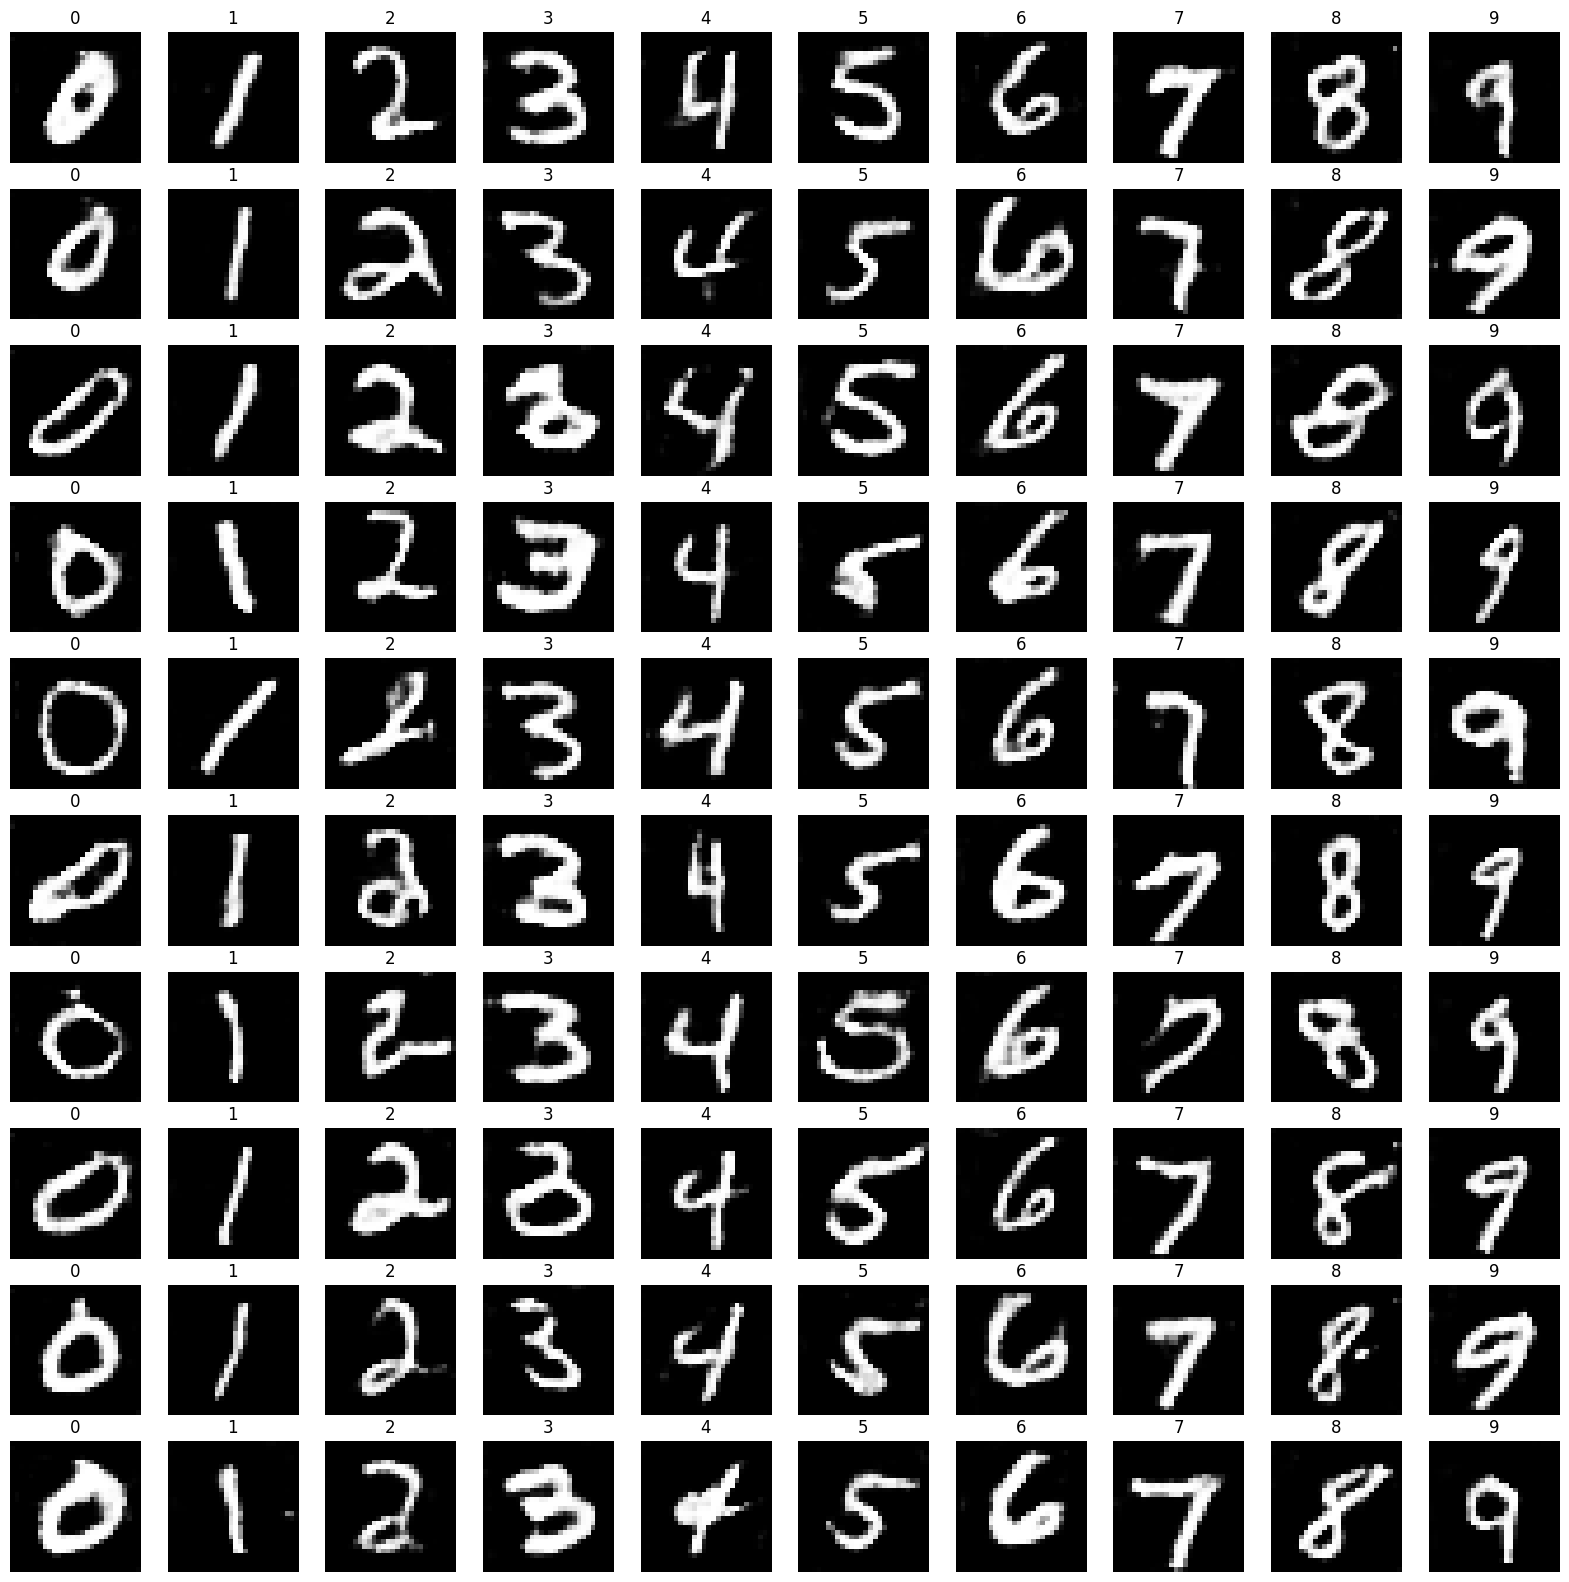

In [74]:
pltAll(generator = generator, img_per_label = 10)